# Root finding

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def newton_method(f,fp,x0,maxit=100,tol=1e-8):   #fill in your newton method here
    #newtons method with x0 initial guess
    #inputs: f -- function
    #        fp -- derivative of f
    #        x0 -- initial guess
    #         maxiter -- max iterations
    #       tol --- tolerance
    
    numit = 0  #keep track of iterations
    diff = tol + 1.
    x = x0
    
    while (np.abs(diff) > tol) and (numit < maxit):
        xnew = x - f(x)/fp(x)
        numit += 1
        diff = xnew - x
        x = xnew
        print(x)
    
    return x, numit #return something


In [8]:
#test case 1 -- find square root of three
def func(x):
    return x**2 - 3.
def funcp(x):
    return 2.*x

root,nits = newton_method(func,funcp,-.1,100,1.e-10)
print('Found root= {:1.8e} in {:d} iterations'.format(root,nits))
#print(np.sqrt(3))
#print(np.sqrt(3) - root)

-15.05
-7.624667774086379
-4.009063770159931
-2.3786840777102567
-1.8199428042345787
-1.7341731278582593
-1.7320521062406589
-1.7320508075693641
-1.7320508075688772
Found root= -1.73205081e+00 in 9 iterations


In [9]:
#test case 2 -- solve cos x = x
def func(x):
    return np.math.cos(x) - x
def funcp(x):
    return -1.*np.math.sin(x) - 1.

root,nits = newton_method(func,funcp,1,100,1.e-8)
print('Found root= {:1.8e} in {:d} iterations'.format(root,nits))

0.7503638678402439
0.7391128909113617
0.739085133385284
0.7390851332151607
Found root= 7.39085133e-01 in 4 iterations


### example
Solve $\frac{1}{2} + \frac{1}{4}x^2 - x\sin(x) = \frac{1}{2}\cos(2x)$.

1.8977529702418763
1.8966250899372334
1.8960600478436749
1.8957772499712897
1.895635781660446
1.8955650301404994
1.8955296500357208
1.8955119588974152
1.8955031130619369
1.8954986900846493
1.895496478588018
1.8954953728077126
1.8954948197932437
1.8954945432780543
1.8954944047278717
1.8954943362139827
1.895494302121959
1.895494287971145
1.895494276113678
1.8954942624424211
1.8954942894769975
1.8954942728841924
1.8954942728841924
Found root= 1.89549427e+00 in 23 iterations
0.0


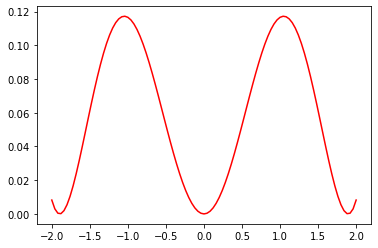

In [17]:
def g(x):
    return(0.5 + 0.25*x*x - x*np.sin(x) - 0.5*np.cos(2.*x))

def gp(x):
    return(0.5*x - np.sin(x) - x*np.cos(x) + np.sin(2.*x))

xs = np.linspace(-2,2,101)
ys = g(xs)
plt.plot(xs,ys,'r');
root,nits = newton_method(g,gp,1.9,100,1.e-8)
print('Found root= {:1.8e} in {:d} iterations'.format(root,nits))
print(g(root))

2.3324675324675326
1.9842561832558543
2.0000015611860515
2.0
2.0
Found root= 2.00000000e+00 in 5 iterations


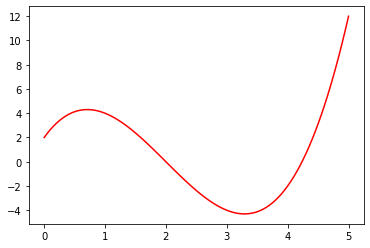

In [22]:
def h(x):
    return(x**3 - 6*x**2 + 7*x +2)

def hp(x):
    return(3*x**2 - 12*x + 7)

xs = np.linspace(0,5,101)
ys = h(xs)
plt.plot(xs,ys,'r');
root,nits = newton_method(h,hp,1.2,100,1.e-8)
print('Found root= {:1.8e} in {:d} iterations'.format(root,nits))

In [ ]:
def secant_method(f,x0,x1,tol=1.e-16,maxit=100):
    #secant method with x0, x1 initial guesses
    diff = x1-x0
    numit = 1
    x = x0
    a = f(x0)
    b = f(x1)
    #print(x) #uncomment print statements if you want to see iterations

    while abs(diff) > tol and numit < maxit:
        xn = x1 - b*(x1-x0)/(b-a)
        diff = xn - x1
        x1,x0 = xn,x1
        a,b = b,f(x1)
        numit += 1
        #print(x)   #uncomment print statements if you want to see iterations
    return xn,numit

### fsolve
fsolve is the command we use in general to solve equations


In [24]:
#look at fsolve doc and solve an example or two from above
from scipy.optimize import fsolve

#test case 2 -- solve cos x = x
def func(x):
    return np.math.cos(x) - x

root = fsolve(func,1.)
print(root[0])

0.7390851332151607


### Lakes
If you visit a lot of lakes of different sizes in different parts of the world, you will see that there are two common physical states. Some lakes are relatively clean and fresh-smelling— these are called oligotrophic. In contrast, eutrophic lakes are overgrown with algae and have a rank smell. Eutrophic lakes have a phosphorus content that is many times higher than that of oligotrophic lakes. Biologists have long known that there does not appear to be a gradation of intermediate states; indeed, rapid eutrophication of formerly oligotrophic lakes is an environmental problem that can be caused by runoff of fertilizer from farms. Why there are no intermediate states, how eutrophication occurs, and the possibility of restoring a eutrophic lake are all questions that can be explored with a simple mathematical model due to a 1999 paper by Carpenter et al.

$\frac{dp}{dt} = b - p + r\frac{p^q}{1 + p^q}$.

This nondimensionalized model incorporates three mechanisms for change in phosphorus content in a lake on the LHS of the DE. The first term, 
b
 represents the influx of phosphorus from the environment; this can include artificial sources such as farm runoff as well as natural sources such as decomposition of plants. The standard use of phosphates in laundry and dishwashing detergents was linked to lake eutrophication in the late 1960s and spawned one of the early conflicts between the environmental movement and industry. Phosphates are still used in some detergents, but smaller amounts and better treatment of wastewater have significantly reduced their contribution to eutrophication. The second term represents the combined processes of sedimentation, outflow, and absorption by plants, all of which remove phosphorus from the water. The last term represents the recycling of phosphorus from sediments. This term plays a significant role in the physical system, because the large values typical of $q$ (from 2 for a cold deep lake to as much as 20 for a warm shallow lake) mean that the recycling rate is roughly 
$r$ when $p>1$ and very small when $ p<1$. Thus, eutrophic lakes, which are high in phosphorus, have large recycling rates that keep the phosphorus concentration high; oligotrophic lakes, in contrast, have very little recycling of sedimentary phosphorus.

Let $b = 0.25, r=5$, and $q=8$. Find the equilibrium solutions to this DE.


In [37]:
def rhs(p,b,r,q):
    #b = 0.25
    #r = 5.
    #q = 8.
    return(b - p + r*p**q/(1.+p**q))

root = fsolve(rhs,0.3,args=(.25,5.,8.))
print(root)

[0.25007648]


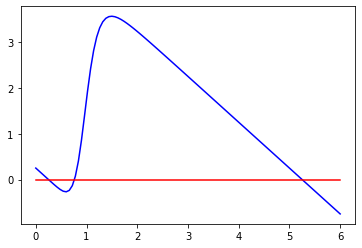

In [33]:
ps = np.linspace(0.,6.,101)
plt.plot(ps,rhs(ps),'b',ps,0*ps,'r');